<a href="https://colab.research.google.com/github/jiin124/Dacon/blob/main/%ED%95%AD%EA%B3%B5%EC%82%AC%20%EA%B3%A0%EA%B0%9D%20%EB%A7%8C%EC%A1%B1%EB%8F%84%20%EC%98%88%EC%B8%A1%20%EA%B2%BD%EC%A7%84%EB%8C%80%ED%9A%8C/%ED%95%AD%EA%B3%B5%EC%82%AC%EB%A7%8C%EC%A1%B1%EB%8F%84_%EC%98%88%EC%B8%A1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')

In [2]:
train=pd.read_csv('/content/drive/MyDrive/airline_dataset/train.csv')
test=pd.read_csv('/content/drive/MyDrive/airline_dataset/test.csv')
sample=pd.read_csv('/content/drive/MyDrive/airline_dataset/sample_submission.csv')

In [3]:
train.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,target
0,1,Female,disloyal Customer,22,Business travel,Eco,1599,3,0,3,3,4,3,4,4,5,4,4,4,5,4,0,0.0,0
1,2,Female,Loyal Customer,37,Business travel,Business,2810,2,4,4,4,1,4,3,5,5,4,2,1,5,2,18,18.0,0
2,3,Male,Loyal Customer,46,Business travel,Business,2622,1,1,1,1,4,5,5,4,4,4,4,5,4,3,0,0.0,1
3,4,Female,disloyal Customer,24,Business travel,Eco,2348,3,3,3,3,3,3,3,3,2,4,5,3,4,3,10,2.0,0
4,5,Female,Loyal Customer,58,Business travel,Business,105,3,3,3,3,4,4,5,4,4,4,4,4,4,5,0,0.0,1


In [4]:
test.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,Female,Loyal Customer,61,Personal Travel,Eco,2037,1,1,1,1,3,5,5,5,5,5,5,3,5,3,51,58.0
1,2,Female,disloyal Customer,27,Business travel,Business,1846,1,1,1,4,1,1,1,1,3,4,5,4,4,1,0,0.0
2,3,Female,Loyal Customer,52,Business travel,Business,1622,4,4,4,4,4,3,4,5,5,5,5,4,5,3,0,0.0
3,4,Male,Loyal Customer,54,Business travel,Business,3534,4,4,4,4,5,4,5,2,2,2,2,5,2,1,0,0.0
4,5,Female,Loyal Customer,41,Business travel,Eco,1471,4,3,3,3,4,4,4,4,3,1,2,5,4,4,0,0.0


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 3000 non-null   int64  
 1   Gender                             3000 non-null   object 
 2   Customer Type                      3000 non-null   object 
 3   Age                                3000 non-null   int64  
 4   Type of Travel                     3000 non-null   object 
 5   Class                              3000 non-null   object 
 6   Flight Distance                    3000 non-null   int64  
 7   Seat comfort                       3000 non-null   int64  
 8   Departure/Arrival time convenient  3000 non-null   int64  
 9   Food and drink                     3000 non-null   int64  
 10  Gate location                      3000 non-null   int64  
 11  Inflight wifi service              3000 non-null   int64

In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 2000 non-null   int64  
 1   Gender                             2000 non-null   object 
 2   Customer Type                      2000 non-null   object 
 3   Age                                2000 non-null   int64  
 4   Type of Travel                     2000 non-null   object 
 5   Class                              2000 non-null   object 
 6   Flight Distance                    2000 non-null   int64  
 7   Seat comfort                       2000 non-null   int64  
 8   Departure/Arrival time convenient  2000 non-null   int64  
 9   Food and drink                     2000 non-null   int64  
 10  Gate location                      2000 non-null   int64  
 11  Inflight wifi service              2000 non-null   int64

In [3]:
train.drop('id',axis=1,inplace=True)
test.drop('id',axis=1,inplace=True)

## EDA

In [7]:
train.columns

Index(['id', 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Seat comfort', 'Departure/Arrival time convenient',
       'Food and drink', 'Gate location', 'Inflight wifi service',
       'Inflight entertainment', 'Online support', 'Ease of Online booking',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'target'],
      dtype='object')

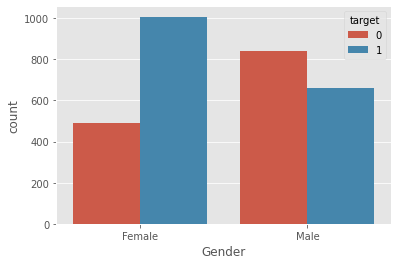

In [16]:
sns.countplot(data=train,x='Gender',hue='target')

여성의 만족도가 남성의 만족도보다 더 높다. 

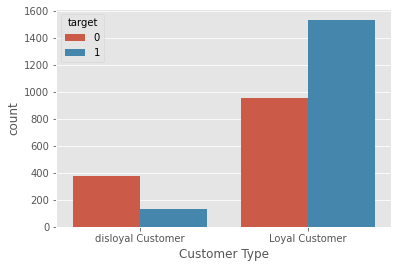

In [17]:
sns.countplot(data=train,x='Customer Type',hue='target')

Loyal customer이 역시나 만족도가 좋다. disloyal이면 불만족이 더 크다.

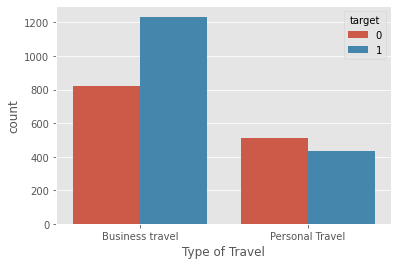

In [18]:
sns.countplot(data=train,x='Type of Travel',hue='target')

비지니스용일 때 만족도가 높고, 개인적으로 이용할 때는 불만족이 더 높다. 

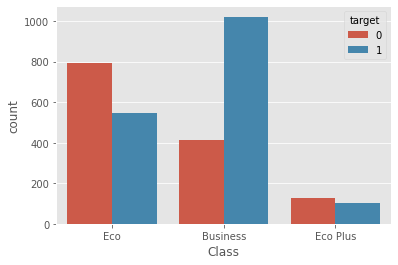

In [19]:
sns.countplot(data=train,x='Class',hue='target')

역시 비지니스석이 만족도비율이 가장 높다.

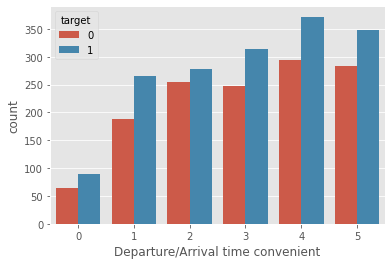

In [23]:
sns.countplot(data=train,x='Departure/Arrival time convenient',hue='target')

출발,도착 시간 편의성 만족도가 높을수록 대개 만족도가 높다. 만족도를 4로 한 사람들이 가장 많은 것도 알 수 있다. 

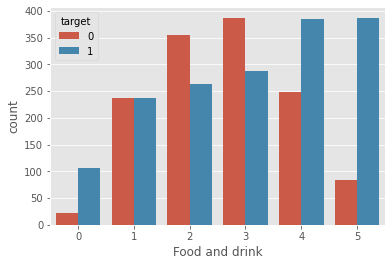

In [25]:
sns.countplot(data=train,x='Food and drink',hue='target')

식음료 만족도와 만족도가 연계성이 꽤 높을 것 같다는 생각이 든다. 만족도가 높을 수록 만족도의 비율이 크고, 식음료 만족도가 낮을 수록 만족도의 비율이 낮다. 

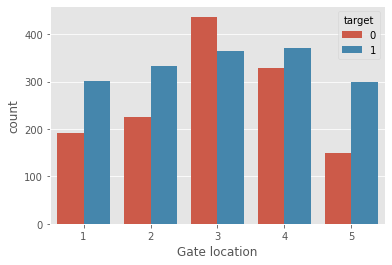

In [26]:
sns.countplot(data=train,x='Gate location',hue='target')

딱히 관계성이 없어보인다. 게이트 위치 만족도가 낮아도 만족도가 높은 사람들이 있었다. 

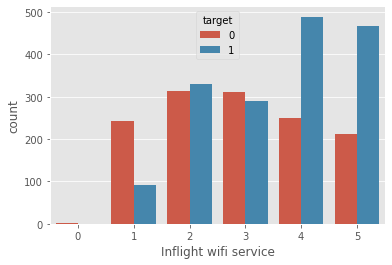

In [27]:
sns.countplot(data=train,x='Inflight wifi service',hue='target')

역시 와이파이는 중요하다. 

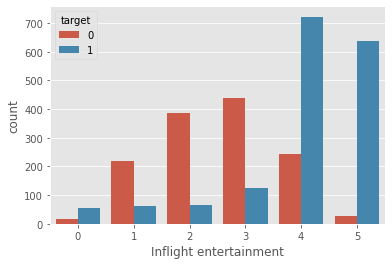

In [28]:
sns.countplot(data=train,x='Inflight entertainment',hue='target')

기내 엔터테인먼트 만족도는 만족도와 큰 연관성을 가질 것이라 생각이 든다. 엔터테인먼트 만족도가 높을수록 만족과 불만족의 비율차이가 크다. 

In [29]:
col=['Online support', 'Ease of Online booking',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Cleanliness', 'Online boarding']

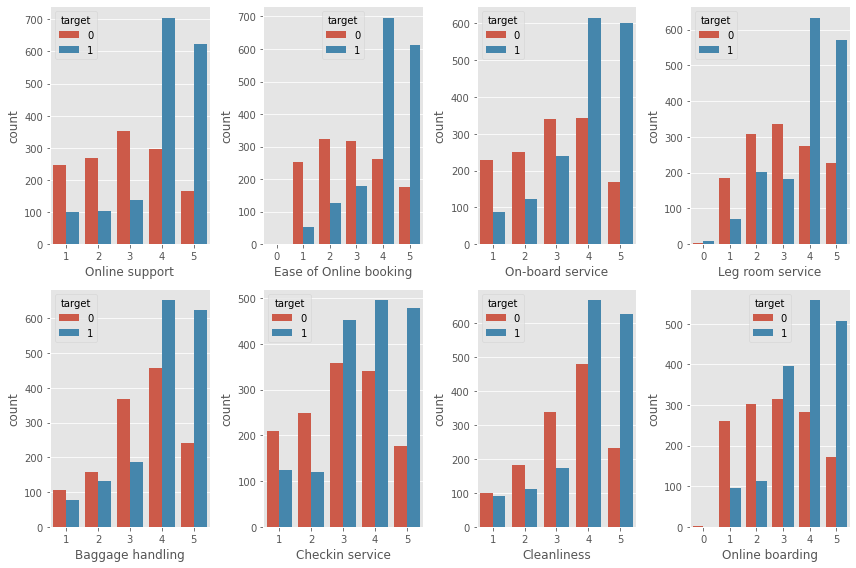

In [31]:
plt.figure(figsize=(12,8))
for i,colname in enumerate(col):
  plt.subplot(2,4,i+1)
  sns.countplot(data=train,x=colname,hue='target')
plt.tight_layout()
plt.show()

In [32]:
train.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Seat comfort', 'Departure/Arrival time convenient',
       'Food and drink', 'Gate location', 'Inflight wifi service',
       'Inflight entertainment', 'Online support', 'Ease of Online booking',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'target'],
      dtype='object')

In [4]:
num=['Age','Flight Distance','Departure Delay in Minutes', 'Arrival Delay in Minutes']

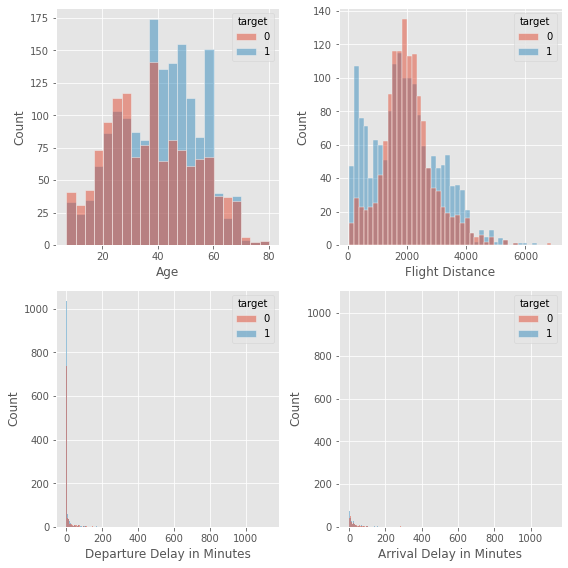

In [36]:
plt.figure(figsize=(12,8))
for i,colname in enumerate(num):
  plt.subplot(2,2,i+1)
  sns.histplot(data=train,x=colname,hue='target')
plt.tight_layout()
plt.show()

departure delay in minutes와 arrival delay in minutes같은 경우 스케일링을 하거나 이상치를 삭제하는게 좋아보인다. 

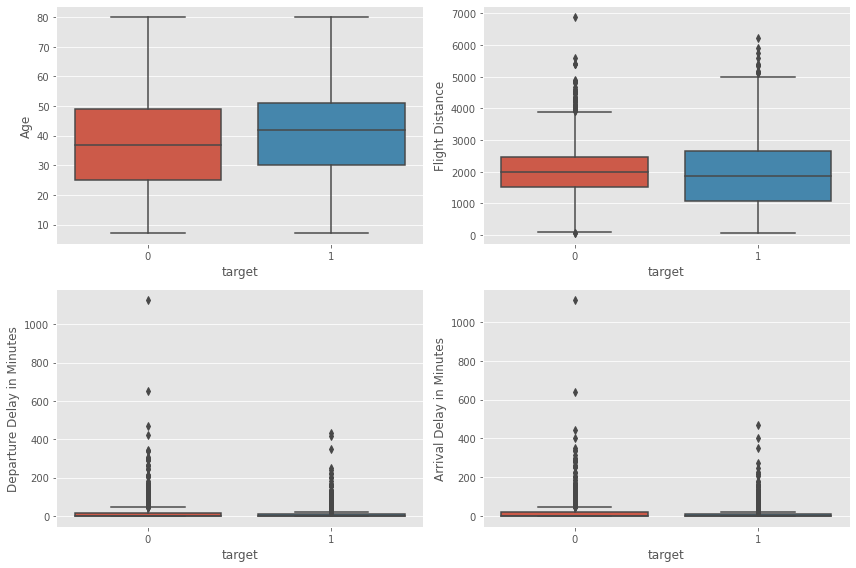

In [38]:
plt.figure(figsize=(12,8))
for i,colname in enumerate(num):
  plt.subplot(2,2,i+1)
  sns.boxplot(data=train,y=colname,x='target')
plt.tight_layout()
plt.show()

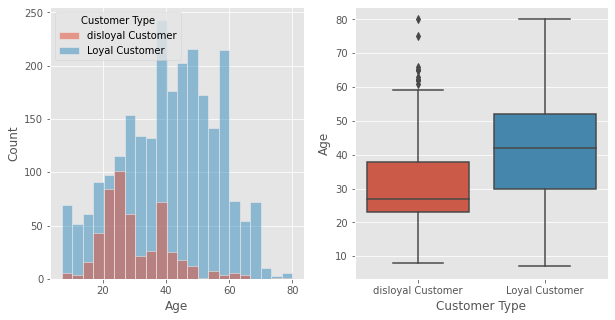

In [47]:
#나이와 customer type의 관계
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.histplot(data=train,x='Age',hue='Customer Type')
plt.subplot(1,2,2)
sns.boxplot(data=train,y='Age',x='Customer Type')

Loyal customer은 disloyar customer보다 나잇대 평균이 더 컸다. 

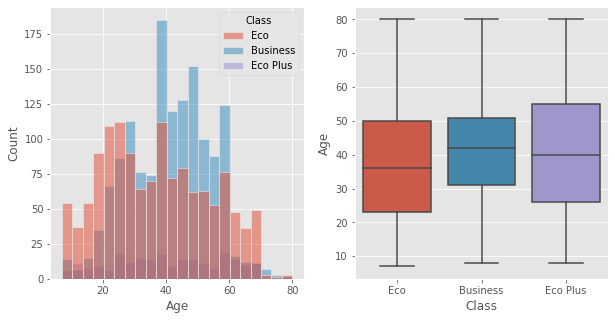

In [48]:
#나이와 class의 관계
#나이와 customer type의 관계
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.histplot(data=train,x='Age',hue='Class')
plt.subplot(1,2,2)
sns.boxplot(data=train,y='Age',x='Class')

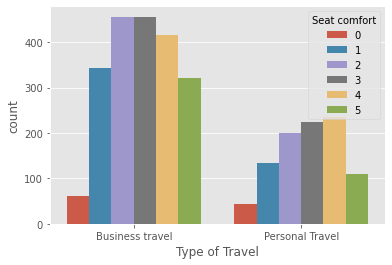

In [49]:
#Type of Travel와 Seat comfort의 관계
sns.countplot(data=train,x='Type of Travel',hue='Seat comfort')

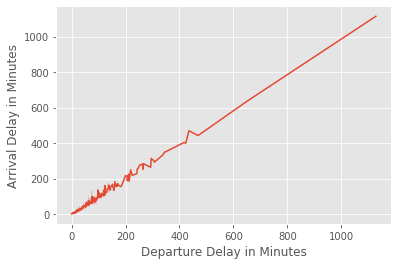

In [50]:
#Departure Delay in Minutes와 Arrival Delay in Minutes의 관계
sns.lineplot(data=train,
             x='Departure Delay in Minutes',
             y='Arrival Delay in Minutes')

거의 선형성을 띈다. 다중공선성을 해결하기 위해 컬럼 하나는 삭제해버릴거임

## 전처리

- object 형식 int형으로 바꾸기
- 이상치 제거
- 만족도 3이하, 5이상 으로 분리
- 출발지연시간, 도착 지연시간 중에 하나 삭제

### object 형식 int로 바꾸기

In [5]:
cat_cols=train.select_dtypes('object').columns.tolist()
cat_cols

['Gender', 'Customer Type', 'Type of Travel', 'Class']

In [6]:
from sklearn.preprocessing import LabelEncoder

la=LabelEncoder()

for i in cat_cols:
  train[i]=la.fit_transform(train[i].values.reshape(-1,1))
  test[i]=la.transform(test[i].values.reshape(-1,1))

display(train.head())
print()
display(test.head())

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,target
0,0,1,22,0,1,1599,3,0,3,3,4,3,4,4,5,4,4,4,5,4,0,0.0,0
1,0,0,37,0,0,2810,2,4,4,4,1,4,3,5,5,4,2,1,5,2,18,18.0,0
2,1,0,46,0,0,2622,1,1,1,1,4,5,5,4,4,4,4,5,4,3,0,0.0,1
3,0,1,24,0,1,2348,3,3,3,3,3,3,3,3,2,4,5,3,4,3,10,2.0,0
4,0,0,58,0,0,105,3,3,3,3,4,4,5,4,4,4,4,4,4,5,0,0.0,1


,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,0,0,61,1,1,2037,1,1,1,1,3,5,5,5,5,5,5,3,5,3,51,58.0
1,0,1,27,0,0,1846,1,1,1,4,1,1,1,1,3,4,5,4,4,1,0,0.0
2,0,0,52,0,0,1622,4,4,4,4,4,3,4,5,5,5,5,4,5,3,0,0.0
3,1,0,54,0,0,3534,4,4,4,4,5,4,5,2,2,2,2,5,2,1,0,0.0
4,0,0,41,0,1,1471,4,3,3,3,4,4,4,4,3,1,2,5,4,4,0,0.0


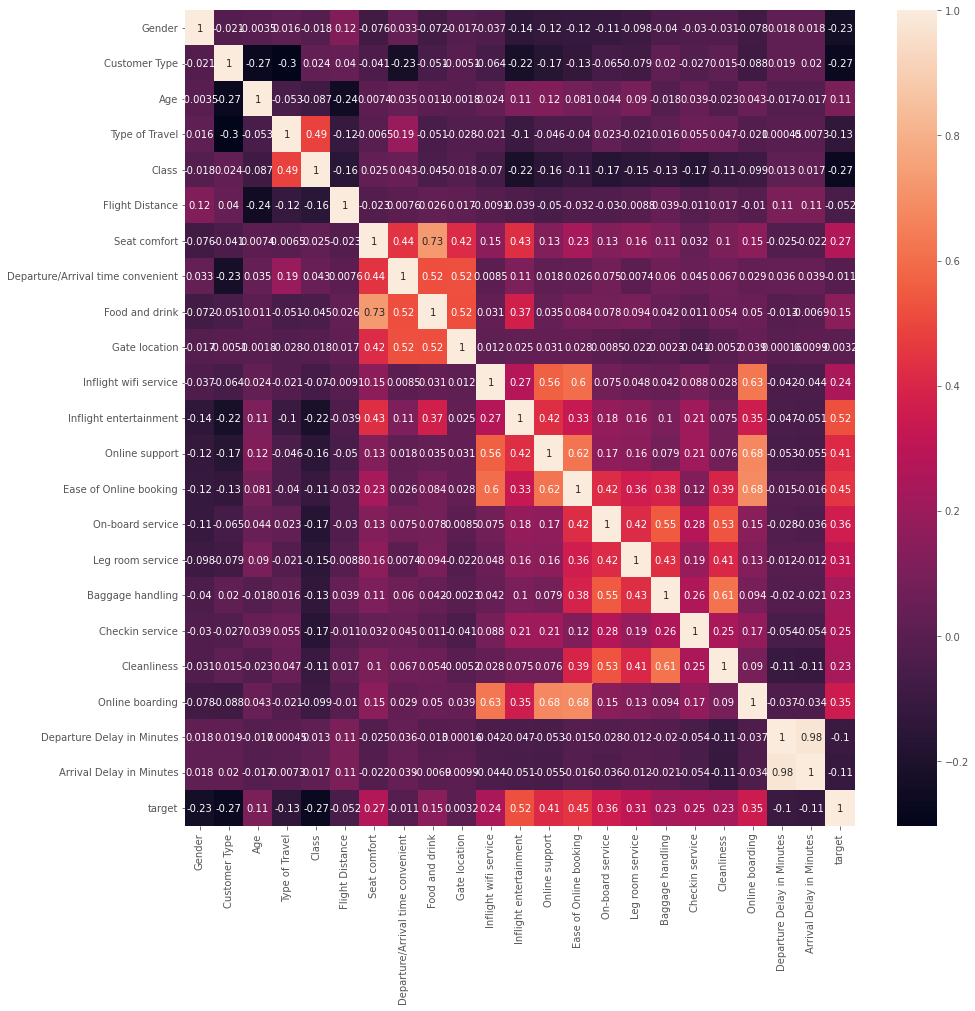

In [7]:
plt.figure(figsize=(15,15))
sns.heatmap(train.corr(),annot=True)

In [73]:
train.columns

Index(['Age', 'Flight Distance', 'Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'target',
       'Gender_Female', 'Gender_Male', 'Customer Type_Loyal Customer',
       'Customer Type_disloyal Customer', 'Type of Travel_Business travel',
       'Type of Travel_Personal Travel', 'Class_Business', 'Class_Eco',
       'Class_Eco Plus'],
      dtype='object')

다중공선성 문제를 어떻게 해결할 것인지가 관건일듯. 너무 연관성이 큰 변수들이 몇개 있다. 

- 'Food and drink' & 'Seat comfort' : food and drink가 target과의 상관성이 더 낮으므로, 삭제
- 'Departure Delay in Minutes' & 'Arrival Delay in Minutes' : Departure Delay in Minutes 삭제



In [8]:
train.drop(['Food and drink','Departure Delay in Minutes'],axis=1,inplace=True)
test.drop(['Food and drink','Departure Delay in Minutes'],axis=1,inplace=True)

### 이상치 제거

- 출발지연시간과 도착 지연 시간 이상치 제거

In [9]:
def outlier(df=None,column=None,weight=1.5):

  #column 데이터만 추출, 1/4분위와 3/4분위 지점을 np.percentile로 구함. 
  data=df[column]
  quantile_25=np.percentile(data.values,25)
  quantile_75=np.percentile(data.values,75)

  #IQR 구하고 IQR에 1.5를 곲해 최댓값과 최솟값 지점 구하기
  iqr=quantile_75-quantile_25
  iqr_weight=iqr*weight
  lowest_val=quantile_25-iqr_weight#이상치 최소 기준
  highest_val=quantile_75+iqr_weight#이상치 최대 기준

  #최댓값보다 크거나 최솟값보다 작은 값을 아웃라이어로 설정하고  DataFrame index 반환. 
  outlier_index=data[(data < lowest_val) | (data > highest_val)].index

  return outlier_index

In [10]:
num=['Arrival Delay in Minutes']

In [11]:
outlier_index={}

for i,colName in enumerate(num):
  outlier_index[i]=outlier(df=train,column=f'{colName}',weight=1.5)
  
outlier_index

{0: Int64Index([   6,   23,   30,   35,   36,   51,   57,   59,   62,   66,
             ...
             2945, 2953, 2954, 2955, 2961, 2966, 2977, 2987, 2995, 2997],
            dtype='int64', length=405)}

In [58]:
#각각의 숫자들 리스트 안에 넣기
outlier_list=[]

for i in range(len(outlier_index)):
  if list(outlier_index[i].values)==[]:
    continue
  outlier_list.append(list(outlier_index[i].values))
print(outlier_list)

[[23, 30, 35, 36, 57, 59, 62, 66, 78, 82, 85, 92, 116, 132, 151, 160, 161, 162, 170, 175, 198, 202, 206, 214, 241, 247, 255, 258, 270, 275, 279, 283, 285, 290, 292, 303, 309, 325, 335, 340, 341, 356, 359, 368, 369, 373, 375, 377, 384, 385, 391, 394, 416, 428, 429, 435, 454, 457, 472, 483, 490, 510, 517, 522, 537, 539, 543, 563, 575, 578, 587, 592, 599, 604, 620, 621, 623, 624, 627, 638, 641, 650, 652, 668, 670, 672, 691, 693, 695, 696, 701, 703, 715, 721, 737, 752, 762, 763, 766, 773, 783, 792, 797, 798, 799, 810, 824, 828, 837, 840, 852, 858, 862, 869, 883, 884, 895, 901, 904, 906, 912, 923, 937, 947, 948, 949, 958, 968, 978, 983, 987, 993, 999, 1001, 1002, 1011, 1013, 1014, 1020, 1027, 1028, 1031, 1034, 1044, 1052, 1053, 1065, 1068, 1069, 1073, 1074, 1088, 1098, 1102, 1103, 1106, 1116, 1122, 1130, 1138, 1140, 1142, 1177, 1183, 1185, 1187, 1188, 1190, 1191, 1195, 1203, 1222, 1232, 1238, 1242, 1246, 1256, 1259, 1271, 1272, 1274, 1277, 1279, 1300, 1302, 1307, 1310, 1324, 1346, 1356, 136

In [59]:
#리스트 안의 리스트들을 하나로 합치기
outlier_list=sum(outlier_list,[])
print(outlier_list)
print('개수 :',len(outlier_list))

#중복숫자제거
outlier_list=set(outlier_list)
print(outlier_list)
print('개수:',len(outlier_list))

#다시 리스트로 변환
outlier_list=list(outlier_list)
print(type(outlier_list))
print(outlier_list)

# 리스트 숫자 정렬
outlier_list.sort()
print(outlier_list)

#ㅈㅔ거
for i in outlier_list:
  train.drop(i,axis=0,inplace=True)

train.shape

[23, 30, 35, 36, 57, 59, 62, 66, 78, 82, 85, 92, 116, 132, 151, 160, 161, 162, 170, 175, 198, 202, 206, 214, 241, 247, 255, 258, 270, 275, 279, 283, 285, 290, 292, 303, 309, 325, 335, 340, 341, 356, 359, 368, 369, 373, 375, 377, 384, 385, 391, 394, 416, 428, 429, 435, 454, 457, 472, 483, 490, 510, 517, 522, 537, 539, 543, 563, 575, 578, 587, 592, 599, 604, 620, 621, 623, 624, 627, 638, 641, 650, 652, 668, 670, 672, 691, 693, 695, 696, 701, 703, 715, 721, 737, 752, 762, 763, 766, 773, 783, 792, 797, 798, 799, 810, 824, 828, 837, 840, 852, 858, 862, 869, 883, 884, 895, 901, 904, 906, 912, 923, 937, 947, 948, 949, 958, 968, 978, 983, 987, 993, 999, 1001, 1002, 1011, 1013, 1014, 1020, 1027, 1028, 1031, 1034, 1044, 1052, 1053, 1065, 1068, 1069, 1073, 1074, 1088, 1098, 1102, 1103, 1106, 1116, 1122, 1130, 1138, 1140, 1142, 1177, 1183, 1185, 1187, 1188, 1190, 1191, 1195, 1203, 1222, 1232, 1238, 1242, 1246, 1256, 1259, 1271, 1272, 1274, 1277, 1279, 1300, 1302, 1307, 1310, 1324, 1346, 1356, 1369

(2515, 28)

In [64]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2515 entries, 0 to 2999
Data columns (total 28 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                2515 non-null   int64  
 1   Flight Distance                    2515 non-null   int64  
 2   Seat comfort                       2515 non-null   int64  
 3   Departure/Arrival time convenient  2515 non-null   int64  
 4   Food and drink                     2515 non-null   int64  
 5   Gate location                      2515 non-null   int64  
 6   Inflight wifi service              2515 non-null   int64  
 7   Inflight entertainment             2515 non-null   int64  
 8   Online support                     2515 non-null   int64  
 9   Ease of Online booking             2515 non-null   int64  
 10  On-board service                   2515 non-null   int64  
 11  Leg room service                   2515 non-null   int64

## 스케일링

age,flight_distance, Arrival Delay in Minutes 범위가 서로 다르니 스케일링 진행

In [12]:
rob=['Age','Flight Distance','Arrival Delay in Minutes']

In [13]:
from sklearn.preprocessing import RobustScaler

ro=RobustScaler()

for i in rob:
  train[i]=ro.fit_transform(train[i].values.reshape(-1,1))
  test[i]=ro.fit_transform(test[i].values.reshape(-1,1))

display(train.head())
display(test.head())

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Arrival Delay in Minutes,target
0,0,1,-0.708333,0,1,-0.281902,3,0,3,4,3,4,4,5,4,4,4,5,4,0.000000,0
1,0,0,-0.083333,0,0,0.728107,2,4,4,1,4,3,5,5,4,2,1,5,2,1.384615,0
2,1,0,0.291667,0,0,0.571309,1,1,1,4,5,5,4,4,4,4,5,4,3,0.000000,1
3,0,1,-0.625000,0,1,0.342786,3,3,3,3,3,3,3,2,4,5,3,4,3,0.153846,0
4,0,0,0.791667,0,0,-1.527940,3,3,3,4,4,5,4,4,4,4,4,4,5,0.000000,1


,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Arrival Delay in Minutes
0,0,0,0.875000,1,1,0.063713,1,1,1,3,5,5,5,5,5,5,3,5,3,4.833333
1,0,1,-0.541667,0,0,-0.097468,1,1,4,1,1,1,1,3,4,5,4,4,1,0.000000
2,0,0,0.500000,0,0,-0.286498,4,4,4,4,3,4,5,5,5,5,4,5,3,0.000000
3,1,0,0.583333,0,0,1.327004,4,4,4,5,4,5,2,2,2,2,5,2,1,0.000000
4,0,0,0.041667,0,1,-0.413924,4,3,3,4,4,4,4,3,1,2,5,4,4,0.000000


### 데이터 나눠주기

In [14]:
X_train=train.drop('target',axis=1)
y_train=train['target']
X_test=test

## 모델링

In [15]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.model_selection import GridSearchCV
 
estimators=[]

lgbm=LGBMClassifier()
estimators.append(lgbm)

xgb=XGBClassifier()
estimators.append(xgb)

etr=ExtraTreesClassifier()
estimators.append(etr)

#모듈의 파라미터들을 할당할 리스트 만들어주기
params=[]

params_lgbm={
    'n_estimators':[90,100,200,300],
    'min_samples_split':[1,2,3,4],
    'learning_rate':[0.05,0.1,0.5],
    'max_depth':[2,3,4]
}
params.append(params_lgbm)

params_xgb={'n_estimatros':[100,300,500],
            'learning_rate':[0.05,0.1,0.3],
            'max_depth':[3,5,7],
            'subsample':[0.1,0.3]}

params.append(params_xgb)

params_etr={
    'n_estimators':[50,60,70,80,90,100,110,120,130,140,150]
}
params.append(params_etr)

In [16]:
from tqdm.auto import tqdm

def gridSearchCV(models,params):
  best_models=[]

  for i in tqdm(range(0,len(models))):
    model_grid=GridSearchCV(models[i],params[i],n_jobs=-1,verbose=1,cv=5)
    model_grid.fit(X_train,y_train)
    best_models.append(model_grid.best_estimator_)
  return best_models

best_model_list=gridSearchCV(estimators,params)

  0%|          | 0/3 [00:00<?, ?it/s]

Fitting 5 folds for each of 144 candidates, totalling 720 fits
Fitting 5 folds for each of 54 candidates, totalling 270 fits
Fitting 5 folds for each of 11 candidates, totalling 55 fits


In [17]:
best_model_list

[LGBMClassifier(learning_rate=0.5, max_depth=4, min_samples_split=1),
 XGBClassifier(max_depth=7, n_estimatros=100, subsample=0.3),
 ExtraTreesClassifier(n_estimators=130)]

In [19]:
best_models=[
             ('lgbm',LGBMClassifier(learning_rate=0.5, max_depth=4, min_samples_split=1)),
             ('xgb',XGBClassifier(max_depth=7, n_estimatros=100, subsample=0.3)),
             ('ex', ExtraTreesClassifier(n_estimators=130))
]

from sklearn.ensemble import VotingClassifier

voting=VotingClassifier(estimators=best_models)
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('lgbm',
                              LGBMClassifier(learning_rate=0.5, max_depth=4,
                                             min_samples_split=1)),
                             ('xgb',
                              XGBClassifier(max_depth=7, n_estimatros=100,
                                            subsample=0.3)),
                             ('ex', ExtraTreesClassifier(n_estimators=130))])

In [20]:
pred=voting.predict(X_test)
pred

array([1, 0, 1, ..., 0, 1, 1])

In [21]:
sample

,id,target
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
1995,1996,0
1996,1997,0
1997,1998,0
1998,1999,0


In [22]:
submit=sample.copy()
submit['target']=pred
submit.to_csv('submit.csv',index=False)

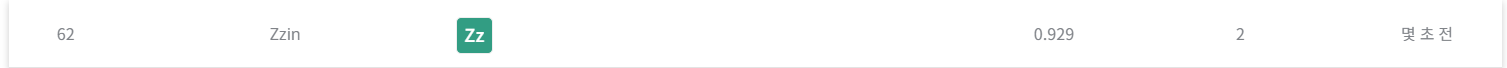